In [1]:
#Importowanie bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
from tensorflow.keras.layers import Input,LSTM,Bidirectional,Dense,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
%matplotlib inline
%config inlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid',palette='muted',font_scale=1.5)

rcParams['figure.figsize']=22,10

In [2]:
#Inicjalizacja akceleratora GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
#Wczytanie zbioru danych
df=pd.read_csv('C:/Users/komej/Downloads/london_merged.csv',parse_dates=['timestamp'],index_col='timestamp')

In [9]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
 9   hour          17414 non-null  int64  
 10  day_of_week   17414 non-null  int64  
 11  day_of_month  17414 non-null  int64  
 12  month         17414 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 2.4 MB


In [10]:
df.index

DatetimeIndex(['2015-01-04 00:00:00', '2015-01-04 01:00:00',
               '2015-01-04 02:00:00', '2015-01-04 03:00:00',
               '2015-01-04 04:00:00', '2015-01-04 05:00:00',
               '2015-01-04 06:00:00', '2015-01-04 07:00:00',
               '2015-01-04 08:00:00', '2015-01-04 09:00:00',
               ...
               '2017-01-03 14:00:00', '2017-01-03 15:00:00',
               '2017-01-03 16:00:00', '2017-01-03 17:00:00',
               '2017-01-03 18:00:00', '2017-01-03 19:00:00',
               '2017-01-03 20:00:00', '2017-01-03 21:00:00',
               '2017-01-03 22:00:00', '2017-01-03 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=17414, freq=None)

In [11]:
#Dodanie kolumn z godziną, dniem tygodnia, miesiąca 
df['hour']=df.index.hour
df['day_of_week']=df.index.dayofweek
df['day_of_month']=df.index.day
df['month']=df.index.month

In [12]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_week,day_of_month,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,6,4,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,6,4,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,6,4,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,6,4,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,6,4,1


<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

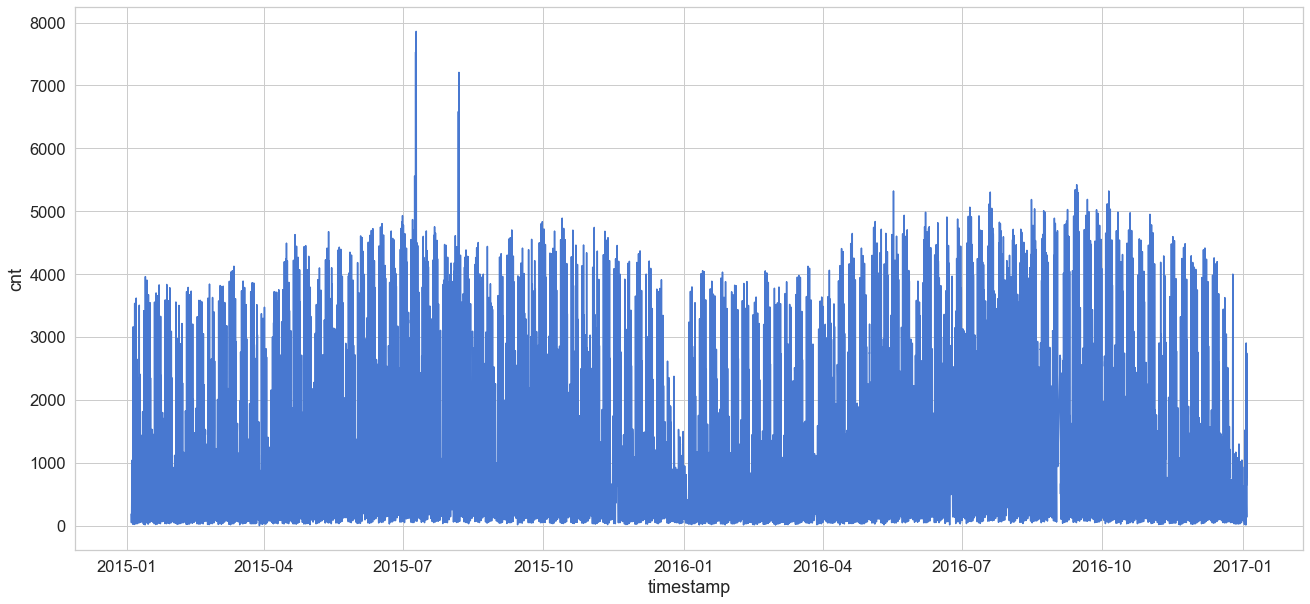

In [13]:
sns.lineplot(x=df.index,y='cnt',data=df)

In [15]:
df_by_month=df.resample('M').sum()

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

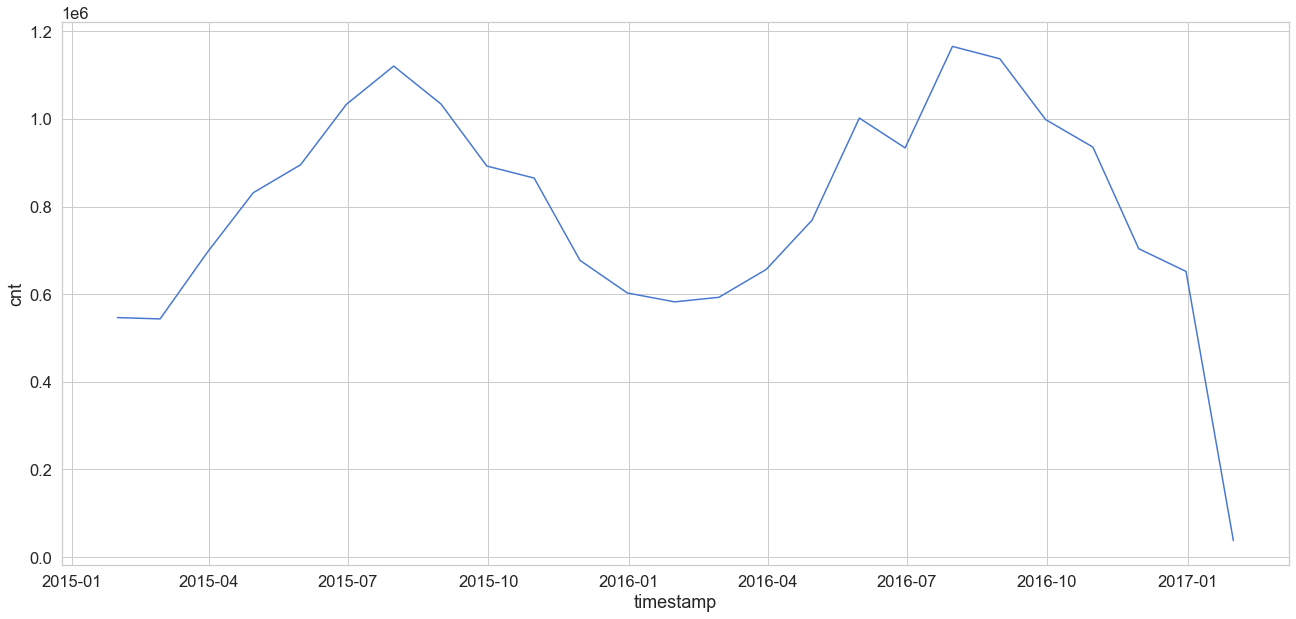

In [17]:
sns.lineplot(x=df_by_month.index,y='cnt',data=df_by_month)

<AxesSubplot:xlabel='hour', ylabel='cnt'>

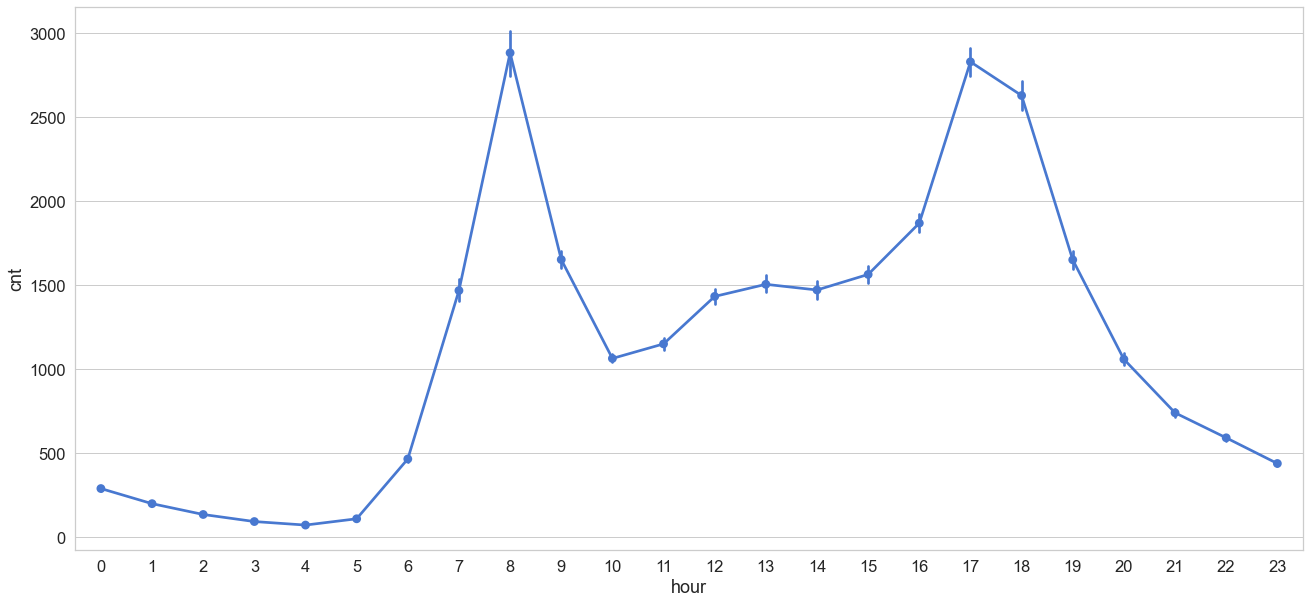

In [18]:
#Sprawdzanie kiedy następuję najwięcej wypożyczeń rowerów.
sns.pointplot(data=df,x='hour',y='cnt')

<AxesSubplot:xlabel='hour', ylabel='cnt'>

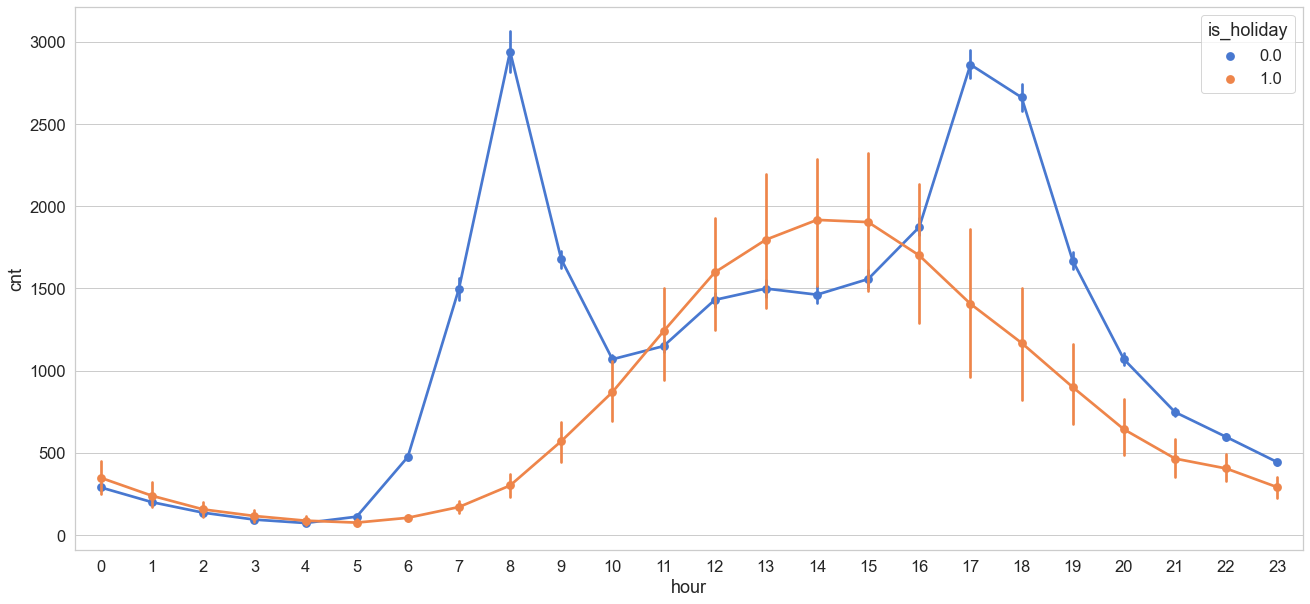

In [19]:
#Zainteresowanie wypożyczeniem rowera ze względu na wolne dni
sns.pointplot(data=df,x='hour',y='cnt',hue='is_holiday')

<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

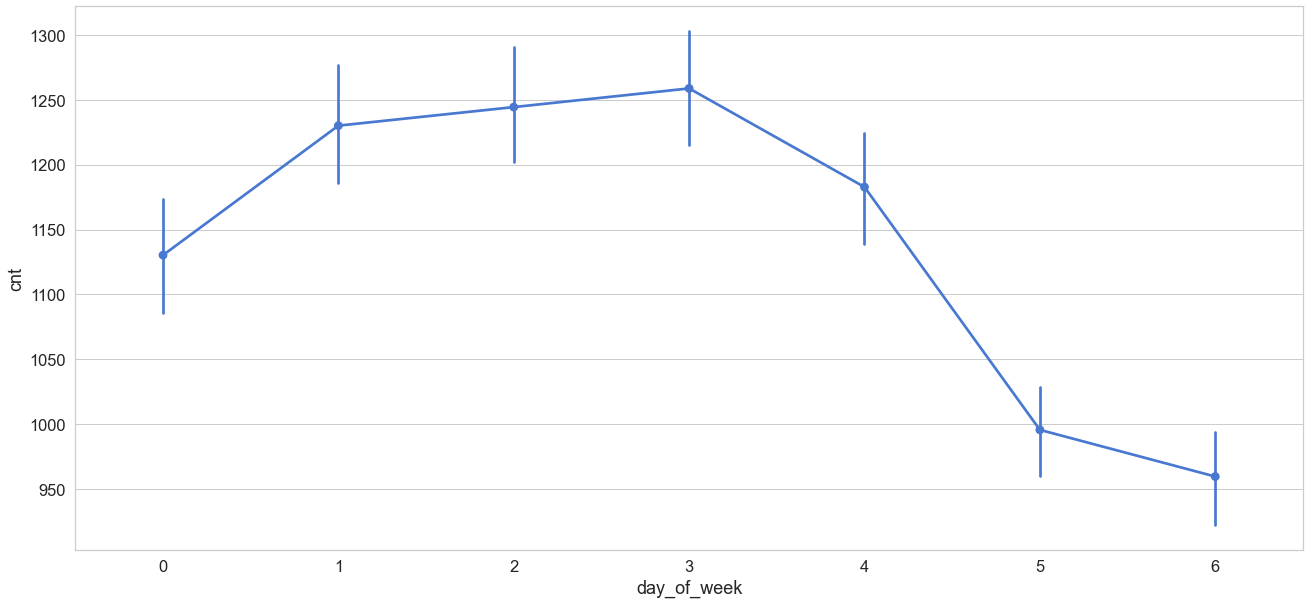

In [20]:
#Zainteresowanie wypożyczeniem rowera w zależoności od dnia tygodnia
sns.pointplot(data=df,x='day_of_week',y='cnt')

In [21]:
train_size=(int(len(df)*0.9))
test_size=len(df)-train_size
train,test=df.iloc[0:train_size],df.iloc[train_size:len(df)]
print(train.shape,test.shape)

(15672, 13) (1742, 13)


In [22]:
from sklearn.preprocessing import RobustScaler

f_columns=['t1','t2','hum','wind_speed']
f_transformer=RobustScaler()
cnt_transformer=RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())

cnt_transformer = cnt_transformer.fit(train[['cnt']])
train['cnt'] = cnt_transformer.transform(train[['cnt']])
test['cnt'] = cnt_transformer.transform(test[['cnt']])

C:\anaconda3\envs\keras\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\anaconda3\envs\keras\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\anaconda3\envs\keras\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [23]:
def create_data_sequence(x,y,time_steps=1):
    xs,ys=[],[]
    for i in range(len(x)-time_steps):
        v= x.iloc[i:(i + time_steps)].values
        xs.append(v)
        ys.append(y.iloc[i+time_steps])
    return np.array(xs),np.array(ys)

In [24]:
time_steps=24
x_train,y_train=create_data_sequence(train,train.cnt,time_steps)
x_test,y_test=create_data_sequence(test,test.cnt,time_steps)

In [80]:
inp=Input(shape=(x_train.shape[1],x_train.shape[2]))
x1=Bidirectional(LSTM(128,return_sequences=True))(inp)
d=Dropout(0.2)(x1)
x2=Bidirectional(LSTM(64))(d)
d2=Dropout(0.2)(x2)
out=Dense(1)(d2)
model=Model(inp,out)

In [81]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 24, 13)]          0         
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 24, 256)           145408    
_________________________________________________________________
dropout_8 (Dropout)          (None, 24, 256)           0         
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 128)               164352    
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 309,889
Trainable params: 309,889
Non-trainable params: 0
_____________________________________________________

In [133]:
#Kompilacja sieci
model.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=1e-3,decay=0.001/10))

In [84]:
#Trenowanie sieci przebiega pomyślnie
history=model.fit(x_train,y_train,epochs=50,batch_size=16,validation_split=0.1,shuffle=False)

Epoch 1/50
881/881 [==============================] - 15s 12ms/step - loss: 0.1830 - val_loss: 0.1220
Epoch 2/50
881/881 [==============================] - 10s 11ms/step - loss: 0.0570 - val_loss: 0.0600
Epoch 3/50
881/881 [==============================] - 10s 11ms/step - loss: 0.0417 - val_loss: 0.0601
Epoch 4/50
881/881 [==============================] - 10s 11ms/step - loss: 0.0350 - val_loss: 0.0328
Epoch 5/50
881/881 [==============================] - 10s 11ms/step - loss: 0.0302 - val_loss: 0.0460
Epoch 6/50
881/881 [==============================] - 10s 11ms/step - loss: 0.0276 - val_loss: 0.0427
Epoch 7/50
881/881 [==============================] - 10s 11ms/step - loss: 0.0251 - val_loss: 0.0270
Epoch 8/50
881/881 [==============================] - 10s 11ms/step - loss: 0.0235 - val_loss: 0.0349
Epoch 9/50
881/881 [==============================] - 10s 11ms/step - loss: 0.0221 - val_loss: 0.0375
Epoch 10/50
881/881 [==============================] - 10s 11ms/step - loss: 0.020

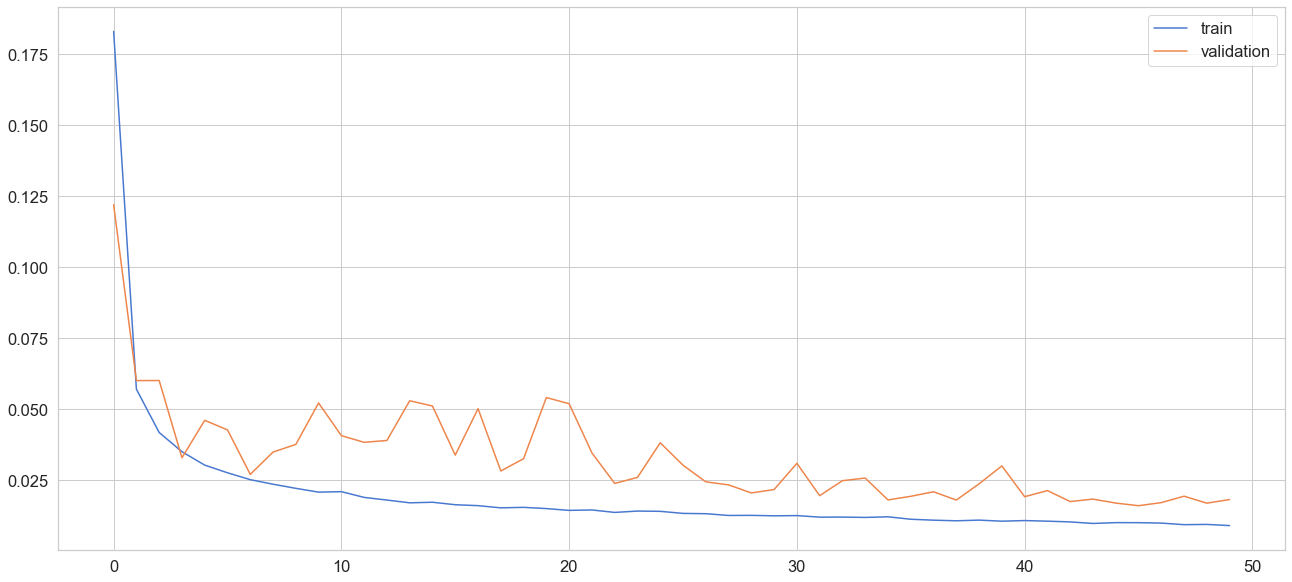

In [85]:
#Wykres 
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()

In [94]:
#Przeprowadzenie prognozy na zbiorze testowym
y_pred=model.predict(x_test)

In [95]:
#Odwrócenie transoframcji danych 
y_train_inv=cnt_transformer.inverse_transform(y_train.reshape(1,-1))
y_test_inv=cnt_transformer.inverse_transform(y_test.reshape(1,-1))
y_pred_inv=cnt_transformer.inverse_transform(y_pred)

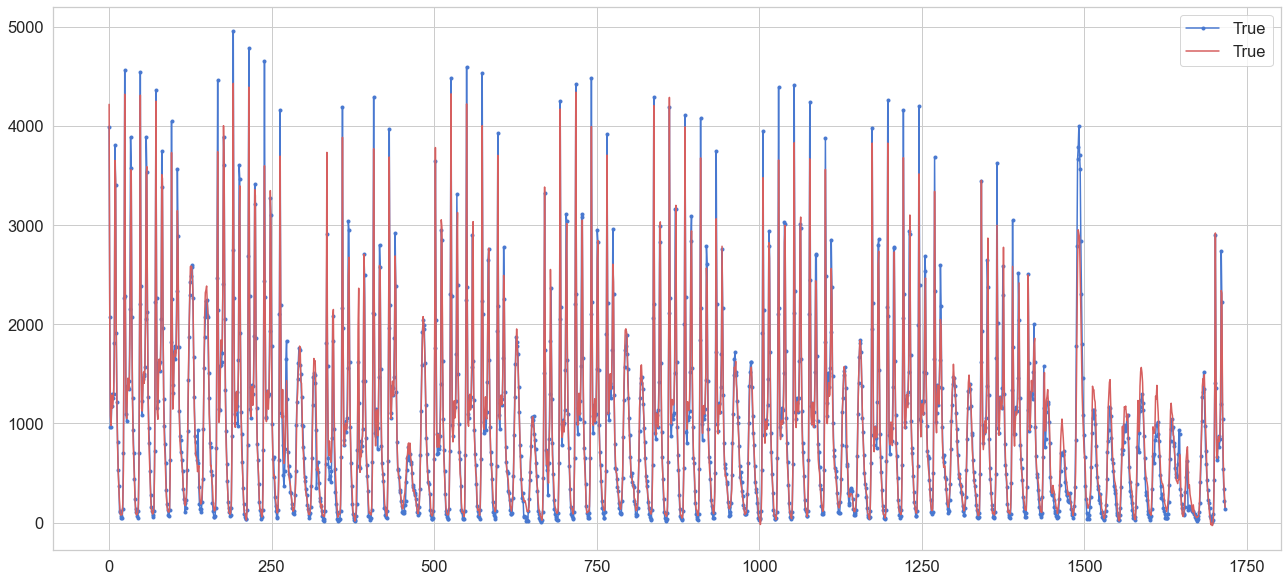

In [96]:
plt.plot(y_test_inv.flatten(),marker='.',label=True)
plt.plot(y_pred_inv.flatten(),'r',label=True)
plt.legend()